<a href="https://colab.research.google.com/github/Adetowobola/Diamond_Prediction/blob/main/streamlit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Diamond prices**

#Problem statement

Build an interactive real-time system which can take features of a diamond and predict its price

#Feature	Description

--> Price-	price in US dollars

--> Carat-	weight of diamond

--> Cut-	Quality of the cut (Fair, good, very good, premium, ideal)

--> Clarity-	how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

FL, IF = Internally Flawless

VVS1, VVS2 = Very Very Slightly Included

VS1, VS2 = Very Slightly Included

SI1, SI2, SI3 = Slightly Included

I1,I2, I3 = Included



--> Color- Diamond colors are rated within a D to Z scale, where D = completely colorless (and the most expensive) and Z = light yellow hue. Typical standard diamond quality falls within the D to J color grade

DEF = Colorless

GHIJ = Near colorless

KLM = Faint yellow

NOPQR = Very light yellow

STUBVWXYZ = Light yellow




--> x-	length in mm

--> y-	width in mm

--> z-	depth in mm

--> depth-	total depth percentage =  2∗z(x+y)


--> table-	width of top of diamond relative to widest point

In [138]:
#loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
#importing data
import requests
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1rAYtC4NcMVKzQdevoyeTr3T0pNKicmlP/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)


df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Step 2 EDA

In [140]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [142]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


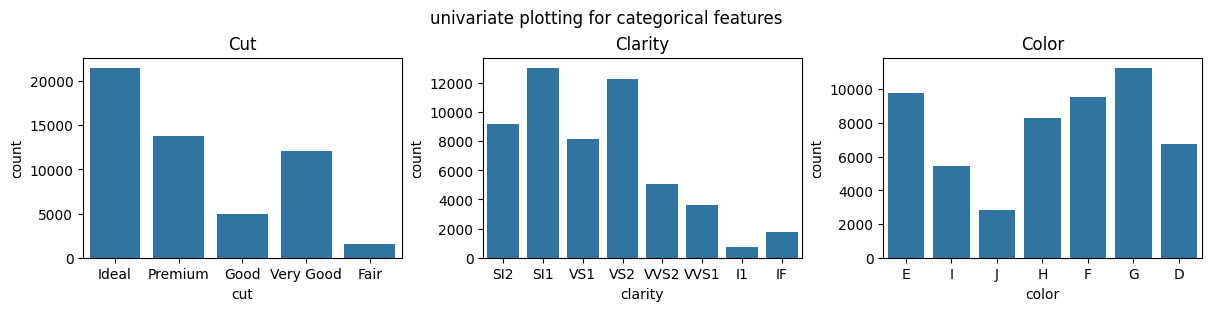

In [143]:
#univariate analysis for the categorical data

fig, axs = plt.subplots(1,3, figsize=(12,3), constrained_layout=True)
fig.suptitle("univariate plotting for categorical features")

axs[0].set_title("Cut")
sns.countplot(data=df, x="cut", ax=axs[0])

axs[1].set_title("Clarity")
sns.countplot(data=df, x="clarity", ax=axs[1])

axs[2].set_title("Color")
sns.countplot(data=df, x="color", ax=axs[2]);




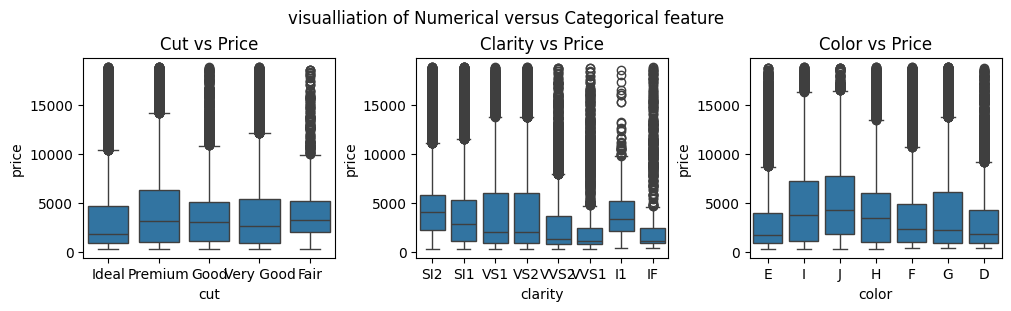

In [144]:
# Bivariate analysis for categorical versus numerical data
fig, axs = plt.subplots(1,3, figsize=(10,3), constrained_layout=True)
fig.suptitle("visualliation of Numerical versus Categorical feature")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df, x="cut", y="price", ax=axs[0])

axs[1].set_title("Clarity vs Price")
sns.boxplot(data=df, x="clarity", y="price", ax=axs[1])

axs[2].set_title("Color vs Price")
sns.boxplot(data=df, x="color", y="price", ax=axs[2]);


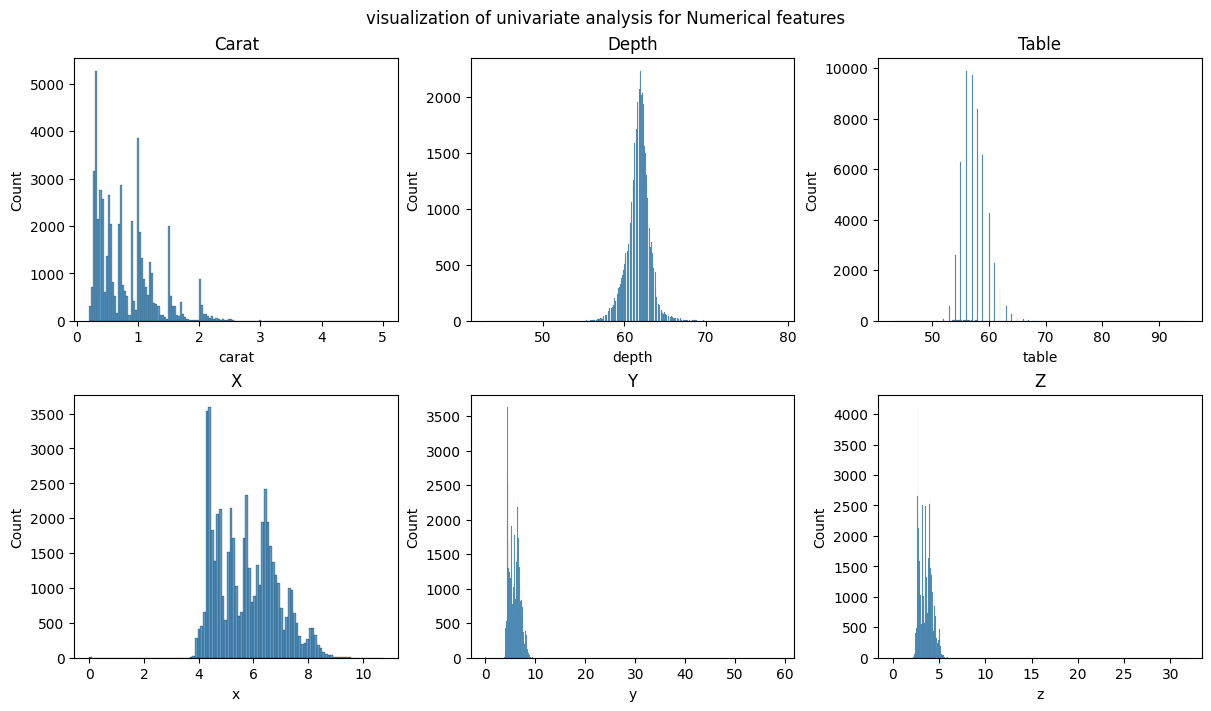

In [145]:
# Univariate analysis for numerical data
fig, axs = plt.subplots(2,3, figsize=(12,7), constrained_layout=True)
fig.suptitle("visualization of univariate analysis for Numerical features")

axs[0,0].set_title("Carat")
sns.histplot(data=df, x="carat", ax=axs[0,0])

axs[0,1].set_title("Depth")
sns.histplot(data=df, x="depth", ax=axs[0,1])

axs[0,2].set_title("Table")
sns.histplot(data=df, x="table", ax=axs[0,2])

axs[1,0].set_title("X")
sns.histplot(data=df, x="x", ax=axs[1,0])

axs[1,1].set_title("Y")
sns.histplot(data=df, x="y", ax=axs[1,1])

axs[1,2].set_title("Z")
sns.histplot(data=df, x="z", ax=axs[1,2]);


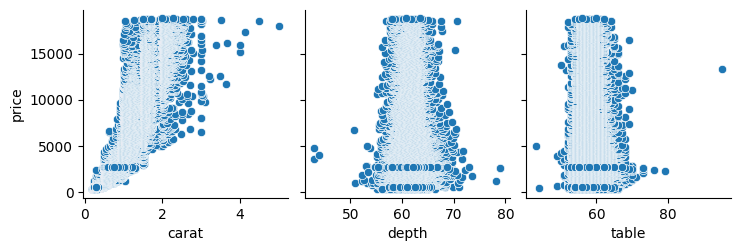

In [146]:
#numerical versus Numerical plot
sns.pairplot(data=df, x_vars=["carat", "depth", "table"], y_vars="price");

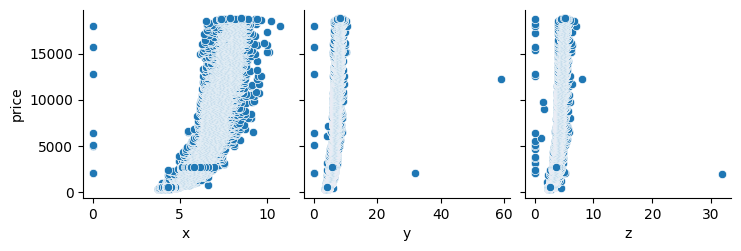

In [147]:
#numerical versus Numerical plot 2
sns.pairplot(data=df, x_vars=["x", "y", "z"], y_vars="price");

#step 3 segregate inputs and outputs

In [148]:
#separating features from target
X = df.drop(columns=["price"])
y = df["price"]

#step 4 splitting data into train and test data

In [149]:
#importing libraries for data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40455, 9) (13485, 9)
(40455,) (13485,)


#step 5 Apply data preparation on training data

In [150]:
#separate data into numerical and categorical features

X_train_cat = X_train.select_dtypes(include=["object"])
X_train_num = X_train.select_dtypes(include=["number"])

In [151]:
X_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [152]:
X_train_num.head()

,carat,depth,table,x,y,z
441,0.89,60.2,59.0,6.26,6.23,3.76
50332,0.70,64.0,53.0,5.57,5.61,3.58
35652,0.31,62.7,57.0,4.33,4.31,2.71
9439,0.90,62.3,59.0,6.12,6.17,3.83
15824,1.01,60.6,62.0,6.52,6.49,3.94


In [153]:
#rescaling using standardiization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

#Dataframe is converted to numpyarray after rescaling thus column names are lost

X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), columns=std_scaler.get_feature_names_out(), index=X_train_num.index)
X_train_num_transformed.describe().round(3)



,carat,depth,table,x,y,z
count,40455.000,40455.000,40455.000,40455.000,40455.000,40455.000
mean,-0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.260,-13.095,-6.484,-5.104,-4.978,-4.985
25%,-0.838,-0.457,-0.652,-0.909,-0.880,-0.885
50%,-0.206,0.101,-0.203,-0.036,-0.020,-0.026
75%,0.511,0.520,0.694,0.722,0.700,0.707
max,8.882,12.041,9.667,4.463,46.156,39.819


categorical features are ordinal thus ordinal encoder isused


In [154]:
#defining the ordering for categorical columns- lowest to highest
cut_cat = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_cat = ["J", "I", "H" "G", "F", "E", "D"]
clarity_cat = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

#creating the ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_cat, color_cat, clarity_cat], handle_unknown= "use_encoded_value", unknown_value=-1, encoded_missing_value=-5)

#applying the encoder
X_train_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat), columns=ordinal_encoder.get_feature_names_out(), index=X_train_cat.index)

X_train_cat_transformed.head()

,cut,color,clarity
441,3.0,-1.0,1.0
50332,2.0,5.0,2.0
35652,4.0,-1.0,5.0
9439,2.0,-1.0,4.0
15824,1.0,3.0,3.0


In [155]:
#concatenate x_train_num_transformed and x_train_cat_transformed

X_train_transformed = pd.concat([X_train_cat_transformed, X_train_num_transformed], axis=1)
X_train_transformed.head()

,cut,color,clarity,carat,depth,table,x,y,z
441,3.0,-1.0,1.0,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528
50332,2.0,5.0,2.0,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918
35652,4.0,-1.0,5.0,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861
9439,2.0,-1.0,4.0,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154
15824,1.0,3.0,3.0,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137


#step 7 Apply data preparation on test data

In [156]:
#separate test data into numerical and categorical features

X_test_cat = X_test.select_dtypes(include=["object"])
X_test_num = X_test.select_dtypes(include=["int64", "float64"])

#applying transformation on numerical data
X_test_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_test_num), columns=std_scaler.get_feature_names_out(), index=X_test_num.index)




#applying the transformation on categorical columns
X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat), columns=ordinal_encoder.get_feature_names_out(), index=X_test_cat.index)

#concatenate x_test_num_transformed and x_test_cat_transformed

X_test_transformed = pd.concat([X_test_cat_transformed, X_test_num_transformed], axis=1)
X_test_transformed.head()

,cut,color,clarity,carat,depth,table,x,y,z
10176,4.0,-1.0,1.0,0.635934,0.186275,-1.098020,0.781840,0.820454,0.821519
16083,4.0,-1.0,2.0,1.037493,0.604743,-0.653789,1.094508,1.072180,1.167656
13420,3.0,1.0,2.0,0.847281,-0.441426,0.234673,1.023041,0.955307,0.922475
20407,4.0,3.0,2.0,1.481323,-0.580916,-0.653789,1.514375,1.458760,1.383992
8909,2.0,3.0,3.0,0.213239,-0.022959,-0.209558,0.388772,0.424884,0.403269


#step 6, 8, 9 Training and Testing Phase --Linear Regression

In [157]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

LR_regressor = LinearRegression()
LR_regressor.fit(X_train_transformed, y_train)


y_test_pred = LR_regressor.predict(X_test_transformed)

LR_MAE = metrics.mean_absolute_error(y_test, y_test_pred)

print("Model's error: ", LR_MAE)

Model's error:  845.2971746391717
CPU times: user 19.1 ms, sys: 975 µs, total: 20.1 ms
Wall time: 16.3 ms


In [158]:
output_df = pd.DataFrame({"Actual": y_test})

output_df["LR predictions"] = y_test_pred

output_df.head()

,Actual,LR predictions
10176,4733,5183.350914
16083,6424,7286.325812
13420,5510,6648.159056
20407,8770,9807.687895
8909,4493,4718.706069


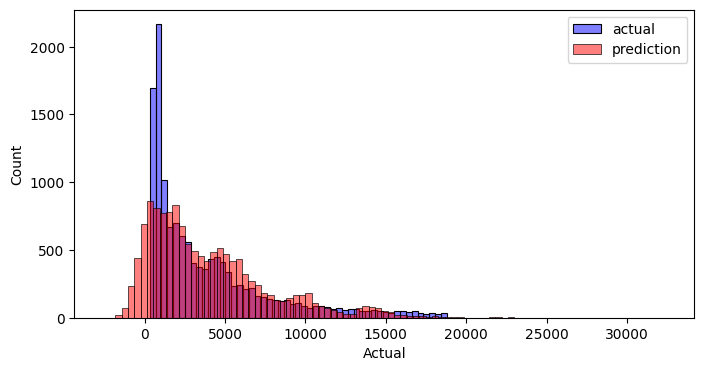

In [159]:
fig, ax = plt.subplots(figsize=(8,4))

sns.histplot(output_df["Actual"], color="blue", alpha=0.5, label="actual")
sns.histplot(output_df["LR predictions"], color="red", alpha=0.5, label="prediction")

plt.legend();

#using KNN Regression

In [160]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

KNN_regressor = KNeighborsRegressor()
KNN_regressor.fit(X_train_transformed, y_train)


y_test_pred = KNN_regressor.predict(X_test_transformed)

KNN_MAE = metrics.mean_absolute_error(y_test, y_test_pred)

print("Model's error: ", KNN_MAE)

Model's error:  399.5998220244716
CPU times: user 989 ms, sys: 1.75 ms, total: 991 ms
Wall time: 1.04 s


In [161]:
output_df["KNN predictions"] = y_test_pred

output_df.head()

,Actual,LR predictions,KNN predictions
10176,4733,5183.350914,4688.8
16083,6424,7286.325812,6582.8
13420,5510,6648.159056,5180.8
20407,8770,9807.687895,12080.0
8909,4493,4718.706069,6015.2


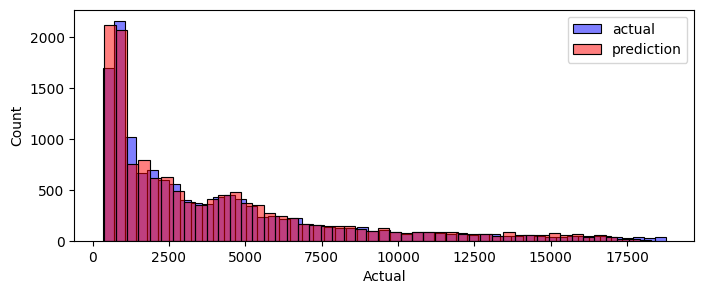

In [162]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df["Actual"], color="blue", alpha=0.5, label="actual")
sns.histplot(output_df["KNN predictions"], color="red", alpha=0.5, label="prediction")

plt.legend();

#using Decision Tree Regression

In [163]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train_transformed, y_train)


y_test_pred = DT_regressor.predict(X_test_transformed)

DT_MAE = metrics.mean_absolute_error(y_test, y_test_pred)

print("Model's error: ", DT_MAE)

Model's error:  402.48739340007415
CPU times: user 446 ms, sys: 7.79 ms, total: 454 ms
Wall time: 478 ms


In [164]:
output_df["DT predictions"] = y_test_pred

output_df.head()

,Actual,LR predictions,KNN predictions,DT predictions
10176,4733,5183.350914,4688.8,4092.0
16083,6424,7286.325812,6582.8,7109.0
13420,5510,6648.159056,5180.8,5098.0
20407,8770,9807.687895,12080.0,12153.0
8909,4493,4718.706069,6015.2,4678.0


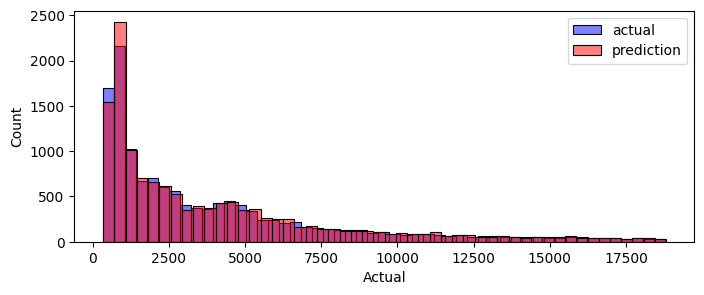

In [165]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df["Actual"], color="blue", alpha=0.5, label="actual")
sns.histplot(output_df["DT predictions"], color="red", alpha=0.5, label="prediction")

plt.legend();

#Using Random Forest regression

In [166]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

RF_regressor = RandomForestRegressor()
RF_regressor.fit(X_train_transformed, y_train)


y_test_pred = RF_regressor.predict(X_test_transformed)

RF_MAE = metrics.mean_absolute_error(y_test, y_test_pred)

print("Model's error: ", RF_MAE)

Model's error:  308.963662909994
CPU times: user 21.6 s, sys: 20.6 ms, total: 21.6 s
Wall time: 21.6 s


In [167]:
output_df["RF predictions"] = y_test_pred

output_df.head()

,Actual,LR predictions,KNN predictions,DT predictions,RF predictions
10176,4733,5183.350914,4688.8,4092.0,4972.80
16083,6424,7286.325812,6582.8,7109.0,7132.40
13420,5510,6648.159056,5180.8,5098.0,5327.03
20407,8770,9807.687895,12080.0,12153.0,11935.40
8909,4493,4718.706069,6015.2,4678.0,4821.17


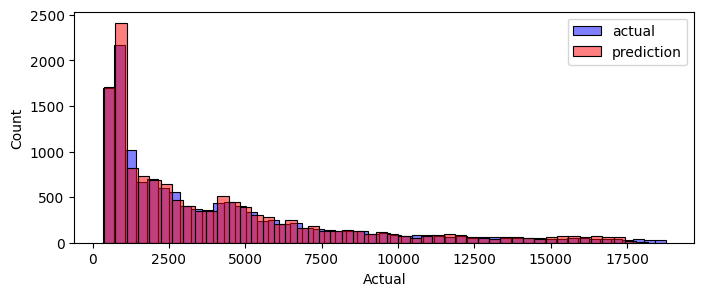

In [168]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df["Actual"], color="blue", alpha=0.5, label="actual")
sns.histplot(output_df["RF predictions"], color="red", alpha=0.5, label="prediction")

plt.legend();

#comparing all models

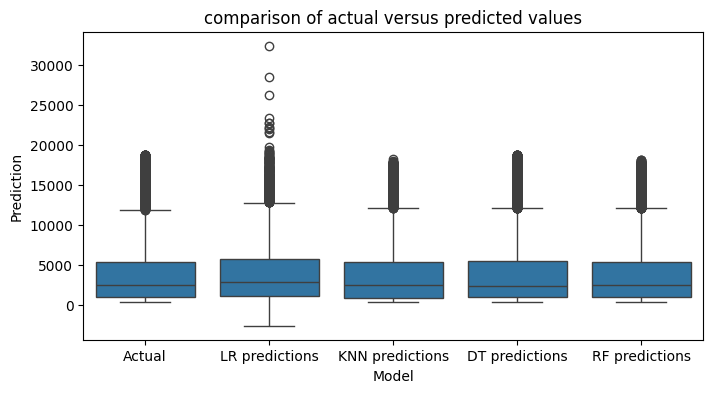

In [169]:
df_melted = pd.melt(output_df, var_name="Model", value_name="Prediction")
fig, ax = plt.subplots(figsize=(8,4))

sns.boxplot(x="Model", y="Prediction", data=df_melted)

plt.title("comparison of actual versus predicted values")

plt.show()

In [170]:
#comparing the MAE values

mae_data = {
    "Algorithm/Model":["Linear regression", "KNN", "Decision Tree", "Random Forest"],
    "Mean Absolute Value": [LR_MAE, KNN_MAE, DT_MAE, RF_MAE]
}

#create the dataframe
models = pd.DataFrame(mae_data)

models

,Algorithm/Model,Mean Absolute Value
0,Linear regression,845.297175
1,KNN,399.599822
2,Decision Tree,402.487393
3,Random Forest,308.963663


The mean absolute error scores is the magnitude of error between the predicted diamond prices and the actual prices for each model .

Linear Regression shows the highest  while Random Forest shows the least  which makes Random forest the most accurate model for the task

In [171]:
import joblib

#save the trained model
joblib.dump(RF_regressor, "random_forest_model.pkl")

#save the scaler
joblib.dump(std_scaler, "scaler.pkl")

#save the encoder
joblib.dump(ordinal_encoder, "encoder.pkl")


print("Model, scaler, and encoder successfully!")

Model, scaler, and encoder successfully!
